In [1]:
# Import the needed librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import sklearn.metrics as m
from sklearn.manifold import TSNE
sns.set(palette='Set1')

In [2]:
# upload dataset into jupyter using pandas

whdf=pd.read_csv('C:/Users/Claire/Downloads/FinalP_WorldHappiness/2016.csv')

In [3]:
# check the shape

whdf.shape

(157, 13)

In [4]:
# check the df

whdf.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
# check the data type

whdf.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Lower Confidence Interval        float64
Upper Confidence Interval        float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
# check the amount of nulls

whdf.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [7]:
# check the check the key metrics

whdf.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [8]:
# get rid of the columns I won't be using

whdf_2016=whdf.drop(['Lower Confidence Interval', 'Upper Confidence Interval','Dystopia Residual'], axis=1)
whdf_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


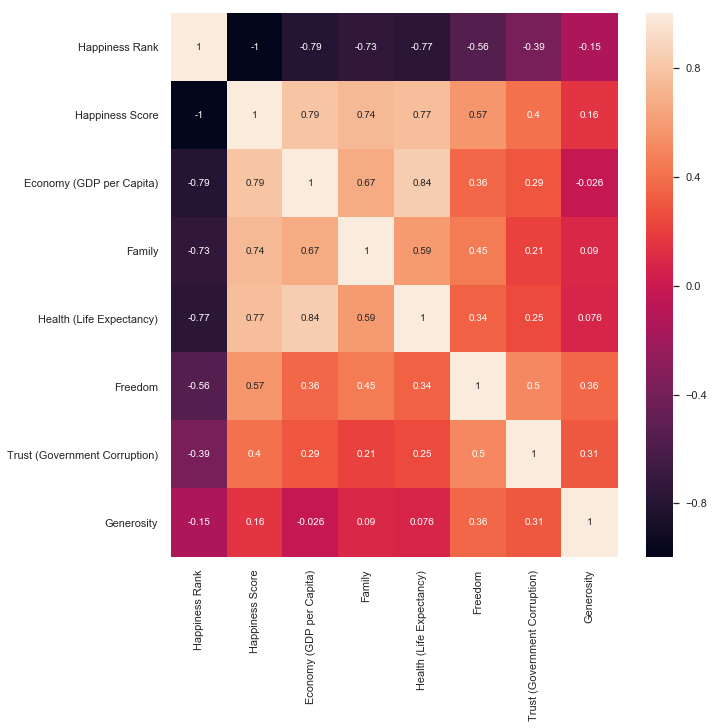

In [9]:
# create a heat map

plt.subplots(figsize=(10,10))
sns.heatmap(whdf_2016.corr(), annot = True)

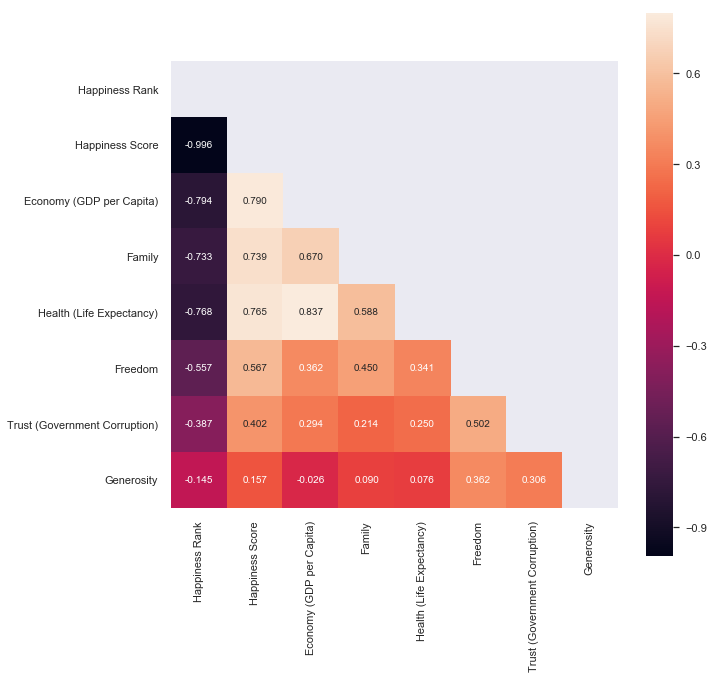

In [10]:
# create a heat map in half

corr = whdf_2016.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(10,10))
sns.heatmap(corr, 
            annot=True, fmt=".3f",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,mask=mask, vmax=.8, square=True)
plt.show()

In [11]:
# set the happiness rank as index since it's the same as happiness score

whdf_2016.set_index('Happiness Rank', drop=True, inplace=True)
whdf_2016.head()

,Country,Region,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,,,,,,,,,
1,Denmark,Western Europe,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
2,Switzerland,Western Europe,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
3,Iceland,Western Europe,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
4,Norway,Western Europe,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
5,Finland,Western Europe,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

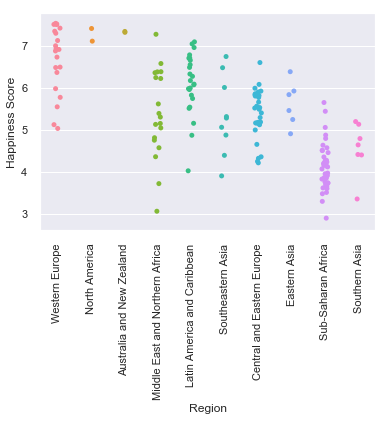

In [12]:
# build plot to check the happiness score per region

sns.stripplot(x="Region", y="Happiness Score", data=whdf_2016)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

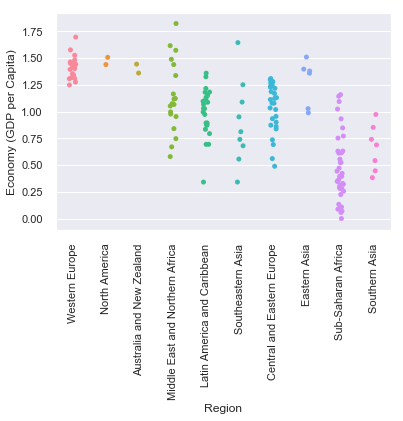

In [13]:
# build plot to check the ecnonomy score per region

sns.stripplot(x="Region", y="Economy (GDP per Capita)", data=whdf_2016)
plt.xticks(rotation=90)

In [14]:
# define top 50/20 and bottom to use in the below charts

top_50 = whdf_2016.sort_values(by=['Happiness Score'], ascending=False).head(50)
top_20 = whdf_2016.sort_values(by=['Happiness Score'], ascending=False).head(20)
bottom_20 = whdf_2016.sort_values(by=['Happiness Score'], ascending=False).tail(20)

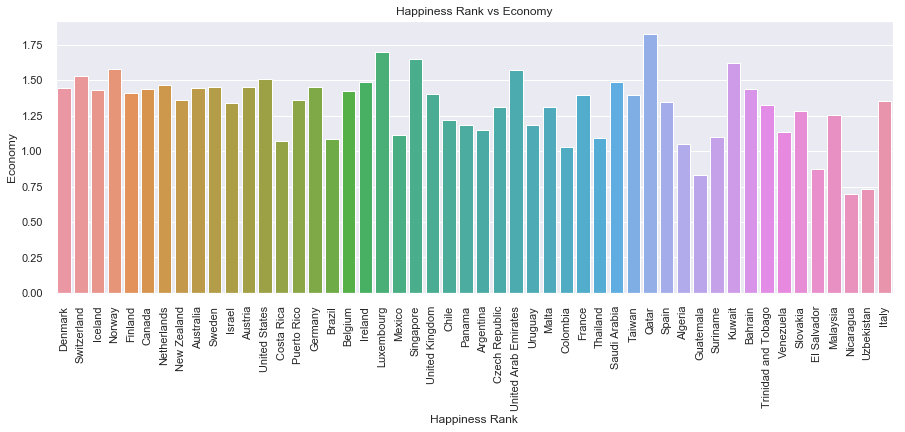

In [15]:
# create a chart comparing happiness and economy based on a top 50

plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Economy (GDP per Capita)'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Economy')
plt.title('Happiness Rank vs Economy')
plt.show()

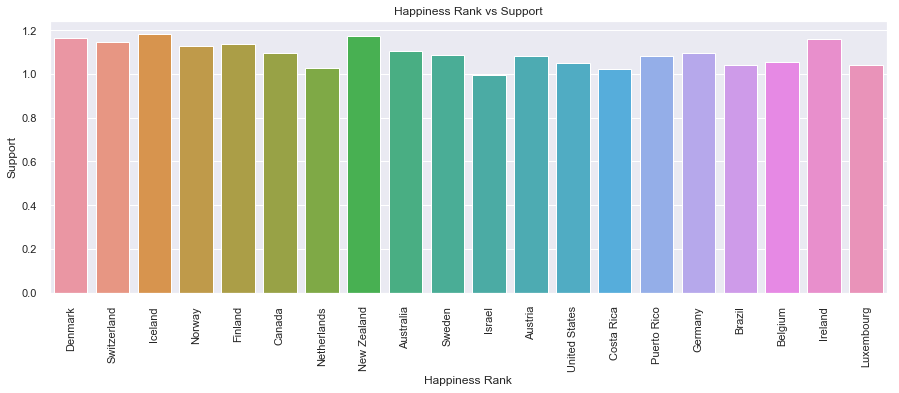

In [16]:
# create a chart comparing happiness and support based on a top 20

plt.figure(figsize= (15,5))
sns.barplot(x = top_20['Country'], y = top_20['Family'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Support')
plt.title('Happiness Rank vs Support')
plt.show()

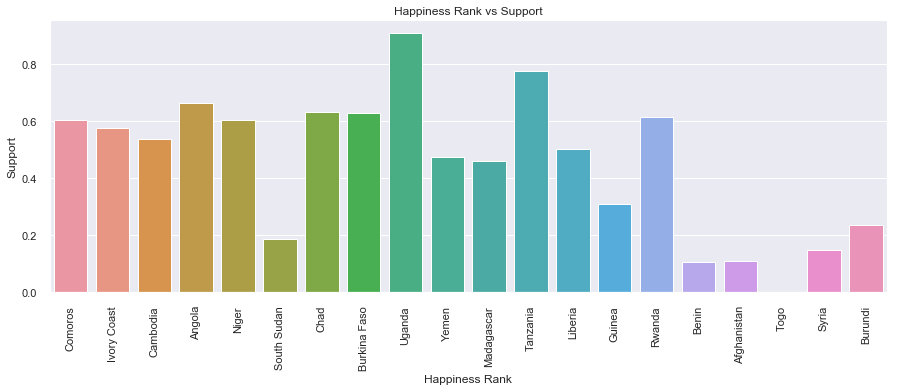

In [17]:
# create a chart comparing happiness and support based on a bottom 20

plt.figure(figsize= (15,5))
sns.barplot(x = bottom_20['Country'], y = bottom_20['Family'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Support')
plt.title('Happiness Rank vs Support')
plt.show()

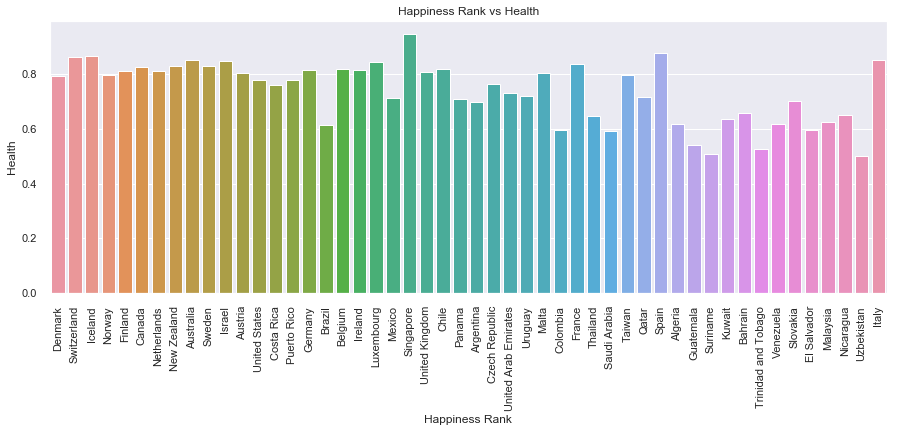

In [18]:
# create a chart comparing happiness and health based on a top 50

plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Health (Life Expectancy)'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Health')
plt.title('Happiness Rank vs Health')
plt.show()

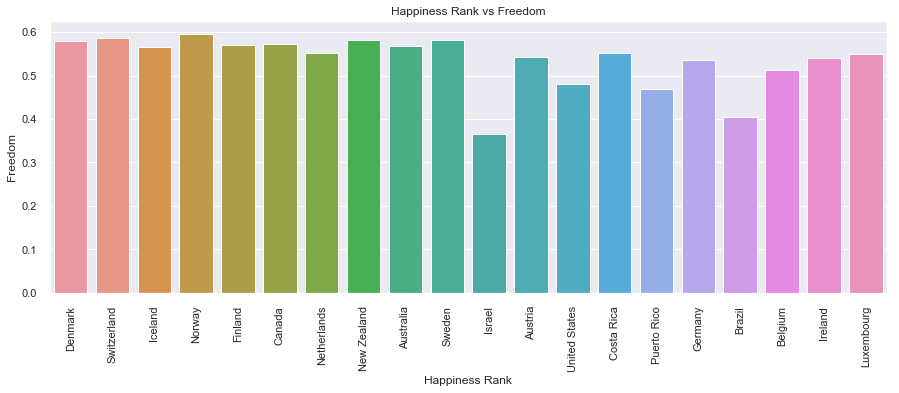

In [19]:
# create a chart comparing happiness and freedom based on a top 20

plt.figure(figsize= (15,5))
sns.barplot(x = top_20['Country'], y = top_20['Freedom'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Freedom')
plt.title('Happiness Rank vs Freedom')
plt.show()

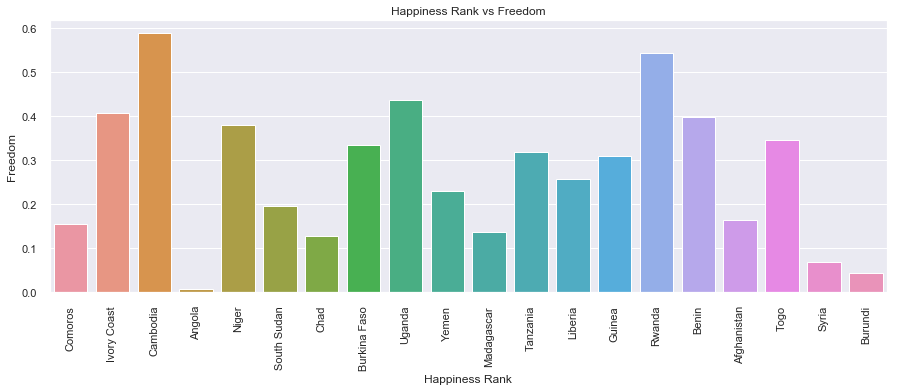

In [20]:
# create a chart comparing happiness and freedom based on a bottom 20

plt.figure(figsize= (15,5))
sns.barplot(x = bottom_20['Country'], y = bottom_20['Freedom'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Freedom')
plt.title('Happiness Rank vs Freedom')
plt.show()

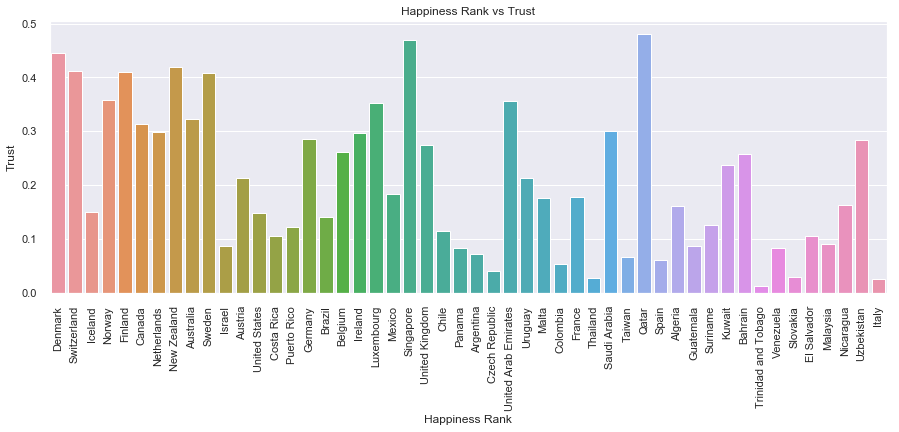

In [21]:
# create a chart comparing happiness and trust based on a top 50

plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Trust (Government Corruption)'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Trust')
plt.title('Happiness Rank vs Trust')
plt.show()

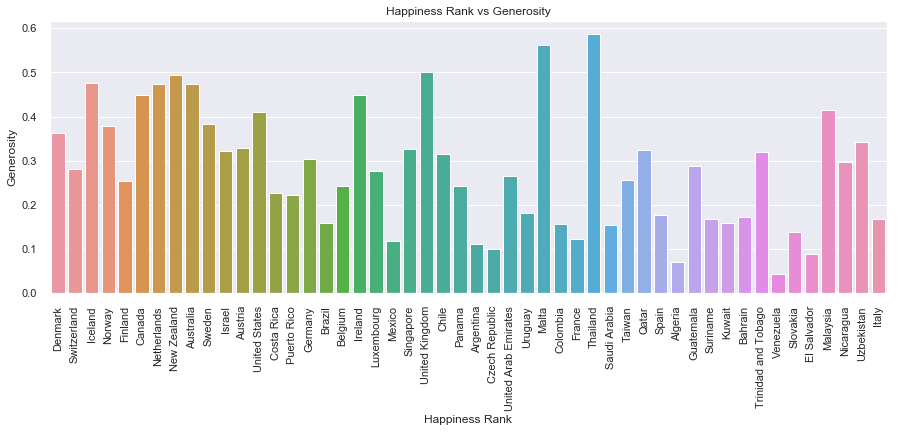

In [22]:
# create a chart comparing happiness and generosity based on a top 50

plt.figure(figsize= (15,5))
sns.barplot(x = top_50['Country'], y = top_50['Generosity'])
plt.xticks(rotation = 90)
plt.xlabel('Happiness Rank')
plt.ylabel('Generosity')
plt.title('Happiness Rank vs Generosity')
plt.show()

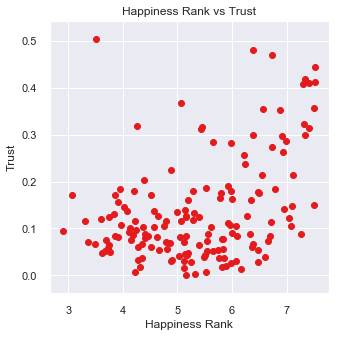

In [23]:
# create a chart comparing happiness and trust

plt.figure(figsize= (5,5))
plt.scatter(x = whdf_2016['Happiness Score'], y = whdf_2016['Trust (Government Corruption)'])
plt.xlabel('Happiness Rank')
plt.ylabel('Trust')
plt.title('Happiness Rank vs Trust')
plt.show()

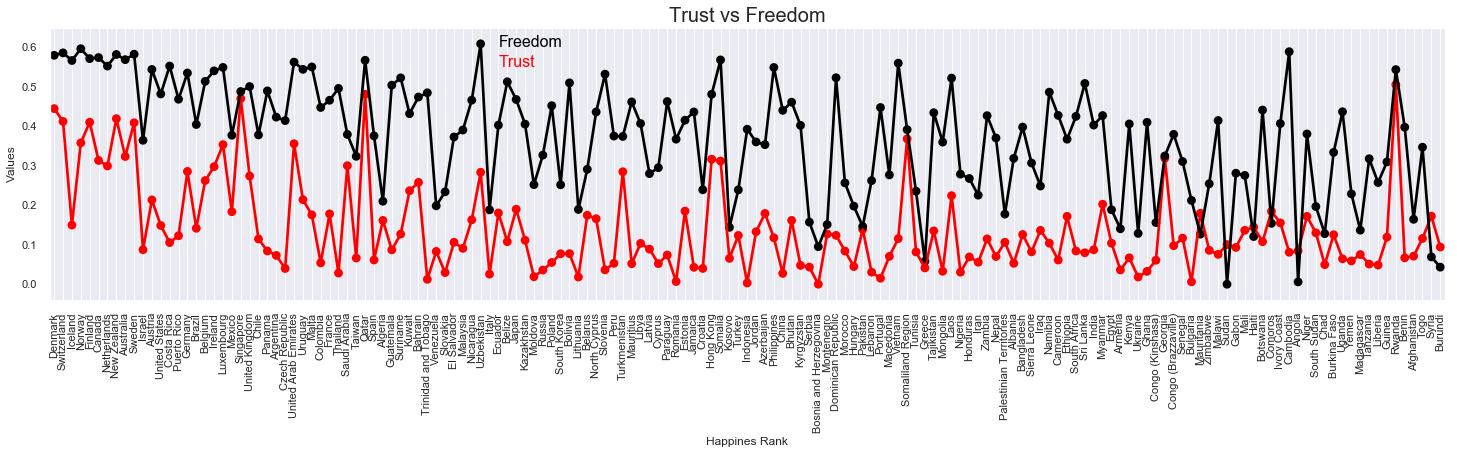

In [24]:
# create a chart comparing freedom and trust

f, ax1 = plt.subplots(figsize=(25,5))
sns.pointplot(x='Country', y='Trust (Government Corruption)', data=whdf_2016, color='red', alpha=0.8)
sns.pointplot(x='Country', y='Freedom', data=whdf_2016, color='black', alpha=1)
plt.xticks(rotation = 90)
plt.text(50,0.55, 'Trust', color='red', fontsize=16)
plt.text(50,0.6, 'Freedom', color='black',fontsize=16)
plt.xlabel('Happines Rank')
plt.ylabel('Values')
plt.title('Trust vs Freedom', fontsize=20)
plt.grid()

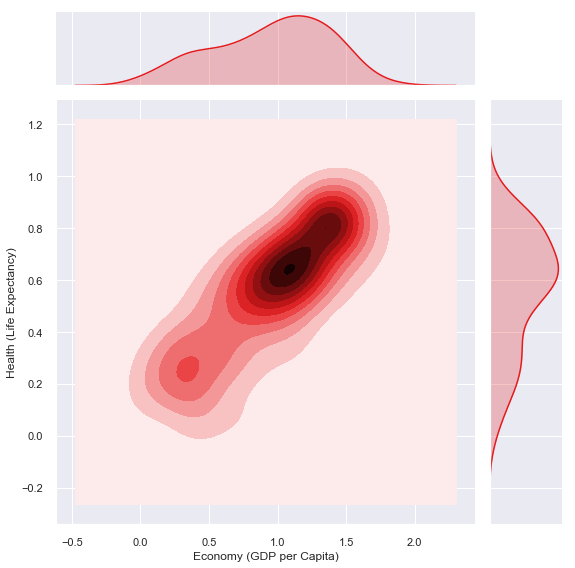

In [25]:
# create a chart comparing economy and health

sns.jointplot(whdf_2016['Economy (GDP per Capita)'], whdf_2016['Health (Life Expectancy)'], kind='kde', height=8)
plt.show()

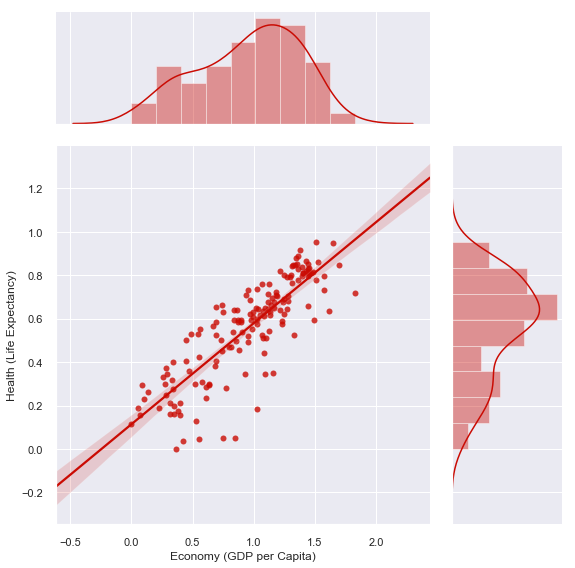

In [26]:
# create a chart comparing economy and health

sns.jointplot(whdf_2016['Economy (GDP per Capita)'], whdf_2016['Health (Life Expectancy)'], kind='reg', height=8,ratio=3, color='r')
plt.show()

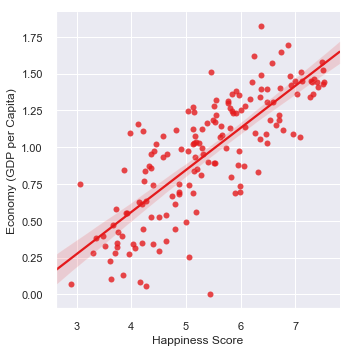

In [27]:
# create a chart comparing economy and happiness

sns.lmplot(x='Happiness Score', y='Economy (GDP per Capita)', data=whdf_2016)
plt.show()

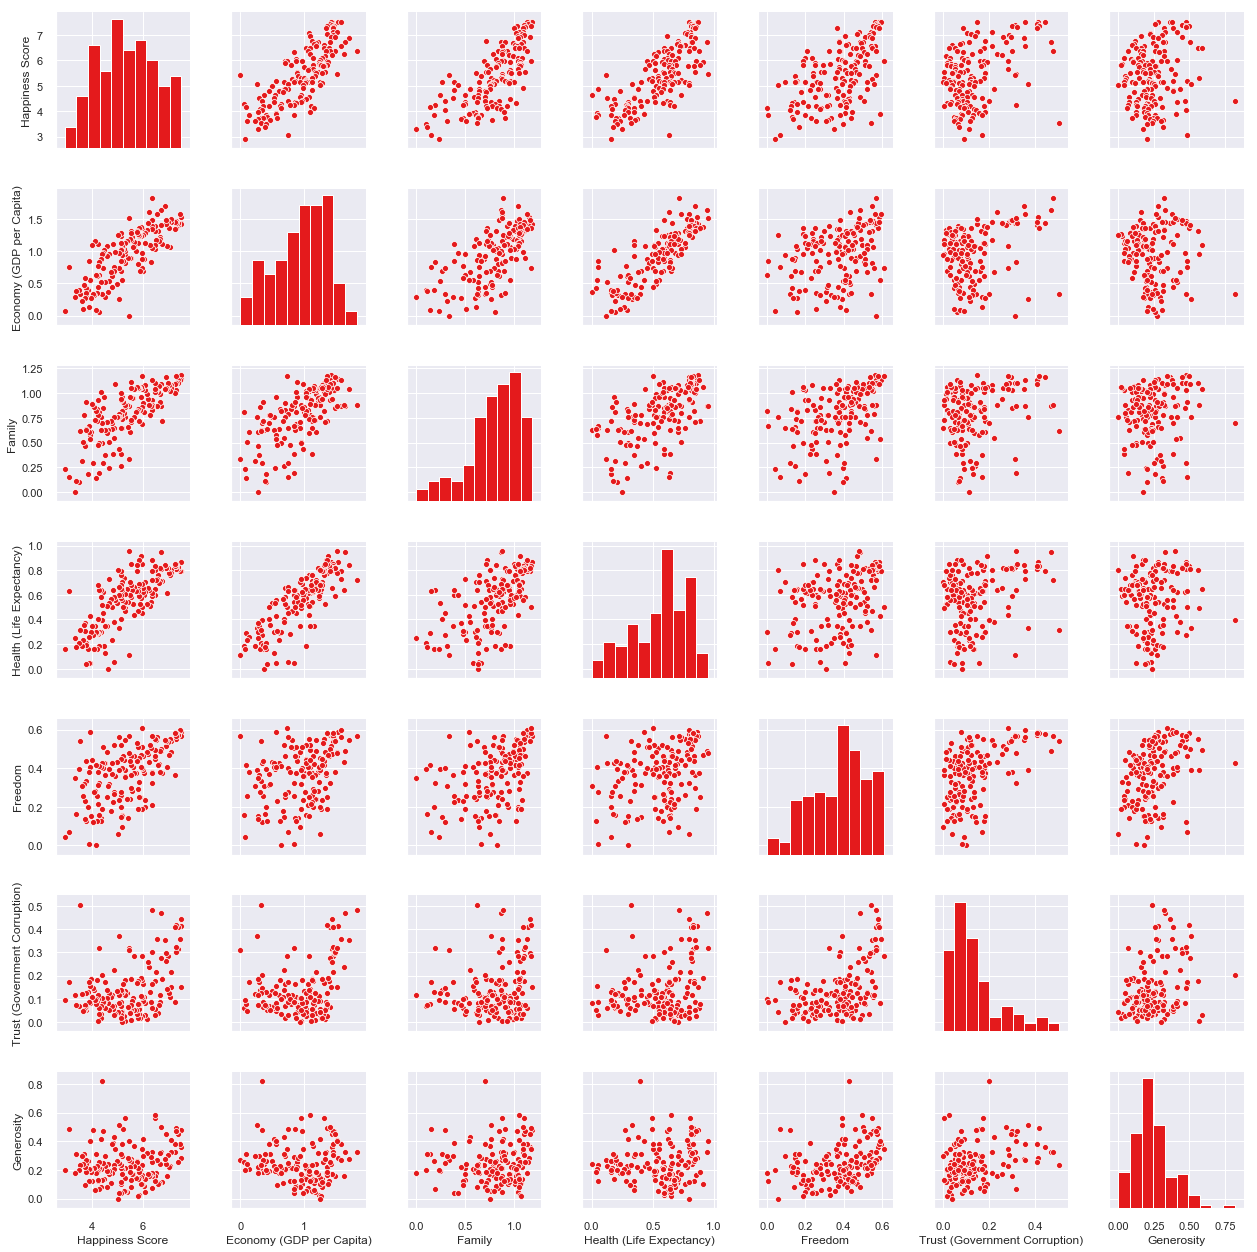

In [28]:
# create a pairplot chart

sns.pairplot(whdf_2016)
plt.show()

In [29]:
# create a df for the model for machine learning

whdf_model = whdf_2016.drop(['Country', 'Region'], axis=1)

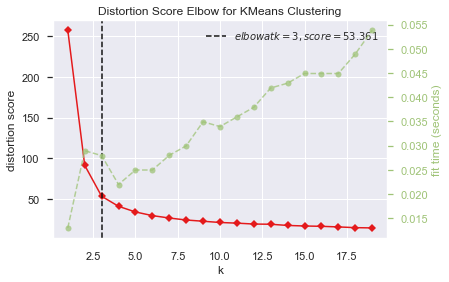

In [30]:
# model 1 = KMeans
# check the ideal number of clusters

model_KM = KMeans()
visualizer = KElbowVisualizer(model_KM, k=(1,20))
visualizer.fit(whdf_model)
visualizer.poof()

In [31]:
kmeans=KMeans(n_clusters=3)
wh_clusters=kmeans.fit(whdf_model)

In [32]:
# Calculate silhouette to check the model quality

y_a = kmeans.predict(whdf_model)
print("Silhouette Score: {}".format(m.silhouette_score(whdf_model, y_a)))

Silhouette Score: 0.43985561759144287


In [33]:
# append the cluster to original df

whdf_2016['Cluster_KMeans']=wh_clusters.fit_predict(whdf_model)

In [34]:
whdf_2016.Cluster_KMeans.value_counts()

2    60
1    54
0    43
Name: Cluster_KMeans, dtype: int64

In [35]:
# check the keys values to analyse the cluster

whdf_2016.groupby('Cluster_KMeans').describe().T

Cluster_KMeans                               0          1          2
Happiness Score               count  43.000000  54.000000  60.000000
                              mean    6.823186   4.113926   5.490900
                              std     0.424181   0.457803   0.363886
                              min     6.168000   2.905000   4.813000
                              25%     6.476000   3.780250   5.159500
                              50%     6.739000   4.197000   5.499000
                              75%     7.193000   4.412250   5.825250
                              max     7.526000   4.876000   6.084000
Economy (GDP per Capita)      count  43.000000  54.000000  60.000000
                              mean    1.358809   0.560978   1.017292
                              std     0.201445   0.296443   0.278214
                              min     0.834540   0.056610   0.000000
                              25%     1.199880   0.341008   0.875545
                              50%     1.402830   0.533370   1.050625
                              75%     1.458245   0.766357   1.234565
                              max     1.824270   1.158510   1.510700
Family                        count  43.000000  54.000000  60.000000
                              mean    1.015108   0.568027   0.837923
                              std     0.113776   0.247725   0.198513
                              min     0.714600   0.000000   0.261350
                              25%     0.935105   0.464595   0.755653
                              50%     1.039380   0.620315   0.860950
                              75%     1.096920   0.721832   0.971530
                              max     1.183260   1.014130   1.168100
Health (Life Expectancy)      count  43.000000  54.000000  60.000000
                              mean    0.754256   0.325565   0.625544
                              std     0.104300   0.179713   0.142009
                              min     0.509330   0.000000   0.114660
                              25%     0.702730   0.190280   0.552127
                              50%     0.795650   0.298700   0.630490
                              75%     0.823595   0.419848   0.687242
                              max     0.947190   0.730070   0.952770
Freedom                       count  43.000000  54.000000  60.000000
                              mean    0.490985   0.298210   0.350505
                              std     0.085304   0.141712   0.130353
                              min     0.210060   0.000000   0.058220
                              25%     0.439505   0.180198   0.248528
                              50%     0.503790   0.314080   0.373385
                              75%     0.557200   0.406412   0.448427
                              max     0.596090   0.588520   0.608480
Trust (Government Corruption) count  43.000000  54.000000  60.000000
                              mean    0.223043   0.109980   0.101286
                              std     0.134828   0.078271   0.082436
                              min     0.012410   0.006150   0.000000
                              25%     0.109990   0.066823   0.042522
                              50%     0.213480   0.093665   0.079580
                              75%     0.318300   0.129070   0.133500
                              max     0.480490   0.505210   0.367940
Generosity                    count  43.000000  54.000000  60.000000
                              mean    0.293917   0.237893   0.210150
                              std     0.134611   0.131187   0.126232
                              min     0.070440   0.062440   0.000000
                              25%     0.174060   0.176042   0.125895
                              50%     0.280830   0.210170   0.205885
                              75%     0.380745   0.268012   0.273952
                              max     0.586960   0.819710   0.565210

In [36]:
whdf_2016.groupby('Cluster_KMeans').mean().T

Cluster_KMeans,0,1,2
Happiness Score,6.823186,4.113926,5.490900
Economy (GDP per Capita),1.358809,0.560978,1.017292
Family,1.015108,0.568027,0.837923
Health (Life Expectancy),0.754256,0.325565,0.625544
Freedom,0.490985,0.298210,0.350505
Trust (Government Corruption),0.223043,0.109980,0.101286
Generosity,0.293917,0.237893,0.210150


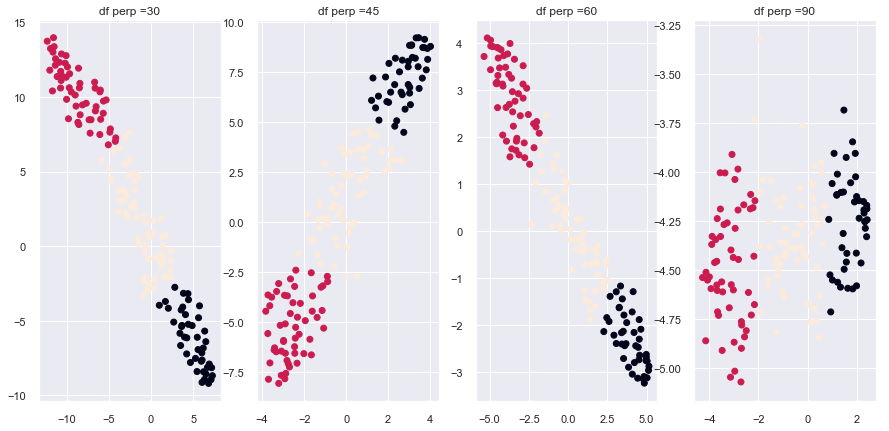

In [37]:
# check the model with TSNE

fig,ax=plt.subplots(1,4,figsize=(15,7))
for i,perp in enumerate([30,45,60,90]):
   tsne=TSNE(perplexity=perp)
   new_x=tsne.fit_transform(whdf_model)
   ax[i].scatter(new_x[:,0],new_x[:,1],c=whdf_2016.Cluster_KMeans)
   ax[i].set_title('df perp ='+str(perp))
plt.show()

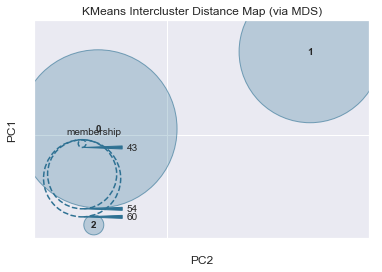

In [38]:
# check the model with inter-cluster distance

from yellowbrick.cluster import InterclusterDistance
viz = InterclusterDistance(KMeans(3))
viz.fit(whdf_model)
viz.poof()

In [39]:
# Model 2_DBSCAN

from sklearn.cluster import DBSCAN

model_DB = DBSCAN(eps=0.37)
model_DB.fit(whdf_model)
whdf_2016['Cluster_DBSCAN']=model_DB.labels_
whdf_2016['Cluster_DBSCAN'].value_counts()

 0    97
-1    35
 2    18
 1     7
Name: Cluster_DBSCAN, dtype: int64

In [40]:
# append the cluster to original df

y_b = model_DB.labels_
print("Silhouette Score: {}".format(m.silhouette_score(whdf_model, y_b)))

Silhouette Score: 0.19152124300212234


In [41]:
whdf_2016.groupby('Cluster_DBSCAN').mean().T

Cluster_DBSCAN,-1,0,1,2
Happiness Score,4.411514,6.080701,4.459286,3.864278
Economy (GDP per Capita),0.720248,1.176326,0.595290,0.348875
Family,0.544201,0.936712,0.559630,0.598499
Health (Life Expectancy),0.429105,0.688158,0.242003,0.226788
Freedom,0.308271,0.411249,0.394079,0.267045
Trust (Government Corruption),0.135015,0.149066,0.077460,0.104431
Generosity,0.264725,0.239057,0.234399,0.222168
Cluster_KMeans,1.171429,1.113402,1.000000,1.000000


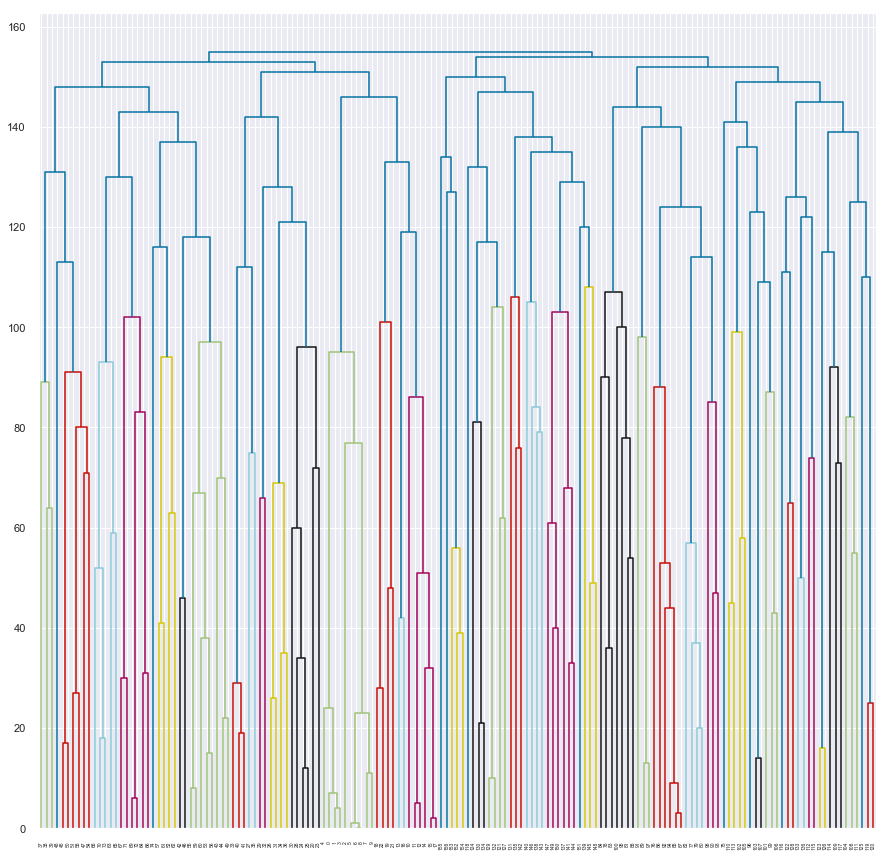

In [42]:
# model 3_ Hierarchy and dendogram

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

hierarchy=AgglomerativeClustering(linkage='ward')
hierarchy.fit(whdf_model)

def plot_dendrogram(model, **kwargs):
    WHM=model.children_
    distance=np.arange(WHM.shape[0])
    no_observations=np.arange(2,WHM.shape[0]+2)
    linkage_matrix = np.column_stack([WHM,distance,no_observations]).astype(float)
    plt.figure(figsize=(15, 15))
#     plt.xticks(whdf_2016['Country'])

    dendrogram(linkage_matrix,**kwargs)
    
plot_dendrogram(hierarchy)

In [43]:
y_c = hierarchy.fit_predict(whdf_model)
print("Silhouette Score: {}".format(m.silhouette_score(whdf_model, y_c)))

Silhouette Score: 0.5044773174102952


In [44]:
# append the cluster to original df

whdf_2016['Cluster_Hierarchy']=hierarchy.fit_predict(whdf_model)

In [45]:
whdf_2016.Cluster_Hierarchy.value_counts()

0    82
1    75
Name: Cluster_Hierarchy, dtype: int64

In [46]:
whdf_2016.groupby('Cluster_Hierarchy').mean().T

Cluster_Hierarchy,0,1
Happiness Score,4.468720,6.380907
Economy (GDP per Capita),0.676308,1.257358
Family,0.627421,0.975333
Health (Life Expectancy),0.413770,0.714894
Freedom,0.305553,0.442542
Trust (Government Corruption),0.105934,0.172271
Generosity,0.235088,0.250887
Cluster_KMeans,1.341463,0.853333
Cluster_DBSCAN,0.121951,-0.026667


In [47]:
# Export the final df to plot some graph in Tableau

whdf_2016.to_csv('C:/Users/Claire/Downloads/FinalP_WorldHappiness/whdf_2016_final.csv')